# **Mouse Lung Radiation Data Analysis**

### Nicholas

02/13/24

### Install & Import Packages

In [ ]:
# Install necessary packages
!pip install scanpy
!pip install numpy
!pip install pandas
!pip install scvi-tools
!pip install scikit-misc

In [ ]:
# Import necessary packages
import scanpy as sc
import pandas as pd
import numpy as np
import scvi

### Set Working Directory

In [10]:
import os
os.chdir('/Users/labuser/Downloads/Rad_sNuc_files-selected')
os.getcwd()

'/Users/labuser/Downloads/Rad_sNuc_files-selected'

In [2]:
os.listdir() 

['.DS_Store',
 '__pycache__',
 'ScRNA_Training-SCVI.ipynb',
 'Annovar_Analysis_Tool.py',
 'ScRNA_Training.ipynb']

### Load Raw Data

In [ ]:
crtl1 = sc.read_10x_h5('Nuc1_output_filtered.h5')
crtl2 = sc.read_10x_h5('Nuc2_output_filtered.h5')
crtl3 = sc.read_10x_h5('CtrlA_output_filtered.h5')
S14_1 = sc.read_10x_h5('R14B_output_filtered.h5')
S14_2 = sc.read_10x_h5('R14C_output_filtered.h5')
S70_1 = sc.read_10x_h5('R70B_output_filtered.h5')
S70_2 = sc.read_10x_h5('R70C_output_filtered.h5')
S120_1 = sc.read_10x_h5('R120A_output_filtered.h5')
S120_2 = sc.read_10x_h5('R120B_output_filtered.h5')

### Add MetaData 

In [310]:
# crtl1
crtl1.obs["sample"]= "crtl1"
crtl1.obs["condition"]= 'Control'
crtl1.obs["timepoint"]="C0"

# crtl2
crtl2.obs["sample"]= "crtl2"
crtl2.obs["condition"]= 'Control'
crtl2.obs["timepoint"]="C0"

# crtl3
crtl3.obs["sample"]= "crtl3"
crtl3.obs["condition"]= 'Control'
crtl3.obs["timepoint"]="C0"

# S14_1
S14_1.obs["sample"]= "S14_1"
S14_1.obs["condition"]= 'Rad'
S14_1.obs["timepoint"]="R14"

# S14_2
S14_2.obs["sample"]= "S14_2"
S14_2.obs["condition"]= 'Rad'
S14_2.obs["timepoint"]="R14"

# S70_1
S70_1.obs["sample"]= "S70_1"
S70_1.obs["condition"]= 'Rad'
S70_1.obs["timepoint"]="R70"

# S70_2
S70_2.obs["sample"]= "S70_2"
S70_2.obs["condition"]= 'Rad'
S70_2.obs["timepoint"]="R70"

# S120_1
S120_1.obs["sample"]= "S120_1"
S120_1.obs["condition"]= 'Rad'
S120_1.obs["timepoint"]="R120"

# S120_2
S120_2.obs["sample"]= "S120_2"
S120_2.obs["condition"]= 'Rad'
S120_2.obs["timepoint"]="R120"

In [312]:
# Create list of raw data
Adata = [crtl1, crtl2, crtl3, S14_1, S14_2, S70_1, S70_2, S120_1, S120_2]

### Doublet Removal | Solo - Machine Learning Method - Cannot run on current computer, need NVIDIA GPU

In [ ]:
# Create Doublet Removal Function 
#Doublet_Results = []
#def doublet_removal(sample):
#    sc.pp.filter_genes(sample, min_cells = 10)
#    sc.pp.highly_variable_genes(sample, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
#    scvi.model.SCVI.setup_anndata(sample)
#    vae = scvi.model.SCVI(sample)
#    vae.train()
#    solo = scvi.external.SOLO.from_scvi_model(vae)
#    solo.train()
#    data_frame = solo.predict
#    data_frame['prediction'] = solo.predict(soft = False)
#    data_frame.index = data_frame.index.map(lambda x: x[:-2])
#    a = data_frame.groupby('prediction').count()
#    Doublet_Results.append(a)
#    data_frame['difference'] = data_frame.doublet - data_frame.singlet
#    doublets_data_frame = data_frame[(data_frame.prediction == 'doublet') & (data_frame.difference > 1)]
#    sample.obs['doublet'] = sample.obs.index.isin(doublets_data_frame.index)
#    sample = sample[~sample.obs.doublet]

In [ ]:
# Run doublet function 
#for i in Adata:
#    doublet_removal(i)

### Scrublet

In [ ]:
!pip install scrublet
import scrublet

In [314]:
# Create function to run scrublet and remove doublets
def scrublet_removal(sample):
    sc.external.pp.scrublet(sample)

In [315]:
# Run Scrublet Remover
for i in Adata:
    scrublet_removal(i)
crtl1 = crtl1[crtl1.obs.predicted_doublet == False]
crtl2 = crtl2[crtl2.obs.predicted_doublet == False]
crtl3 = crtl3[crtl3.obs.predicted_doublet == False]
S14_1 = S14_1[S14_1.obs.predicted_doublet == False]
S14_2 = S14_2[S14_2.obs.predicted_doublet == False]
S70_1 = S70_1[S70_1.obs.predicted_doublet == False]
S70_2 = S70_2[S70_2.obs.predicted_doublet == False]
S120_1 = S120_1[S120_1.obs.predicted_doublet == False]
S120_2 = S120_2[S120_2.obs.predicted_doublet == False]

/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.06
Detected doublet rate = 20.4%
Estimated detectable doublet fraction = 83.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 24.4%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.10
Detected doublet rate = 10.9%
Estimated detectable doublet fraction = 72.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 15.1%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.09
Detected doublet rate = 14.3%
Estimated detectable doublet fraction = 65.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 21.7%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.07
Detected doublet rate = 16.6%
Estimated detectable doublet fraction = 75.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 22.1%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.06
Detected doublet rate = 20.3%
Estimated detectable doublet fraction = 78.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 25.8%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 13.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.06
Detected doublet rate = 19.6%
Estimated detectable doublet fraction = 79.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 24.7%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 6.9%


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

Automatically set threshold at doublet score = 0.10
Detected doublet rate = 12.0%
Estimated detectable doublet fraction = 62.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 19.3%


### Quality Control & Preprocessing 

Mitochondrial and Ribosomal Annotation

In [316]:
# Create list of doublet removed data
Adata = [crtl1, crtl2, crtl3, S14_1, S14_2, S70_1, S70_2, S120_1, S120_2]

In [ ]:
import pandas as pd

In [317]:
# Import ribosomal genes from Broad Institute
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)


In [318]:
# Change casing to match mouse genome
ribo_genes_mouse = []
for i in range(len(ribo_genes)):
    a = ribo_genes[0].values[i][0] + ribo_genes[0].values[i][1:].lower()
    ribo_genes_mouse.append(a)

In [319]:
# Create function to define mitochondrial and ribosomal genes
def mito_ribo(sample):
    sample.var['mt'] = sample.var_names.str.startswith('mt-')
    sample.var['ribo'] = sample.var_names.isin(ribo_genes_mouse)
    sc.pp.calculate_qc_metrics(sample, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    return sample

In [ ]:
# Run function
for i in Adata:
    mito_ribo(i)

In [321]:
crtl1.var_names_make_unique()
crtl2.var_names_make_unique()
crtl3.var_names_make_unique()
S14_1.var_names_make_unique()
S14_2.var_names_make_unique()
S70_1.var_names_make_unique()
S70_2.var_names_make_unique()
S120_1.var_names_make_unique()
S120_2.var_names_make_unique()


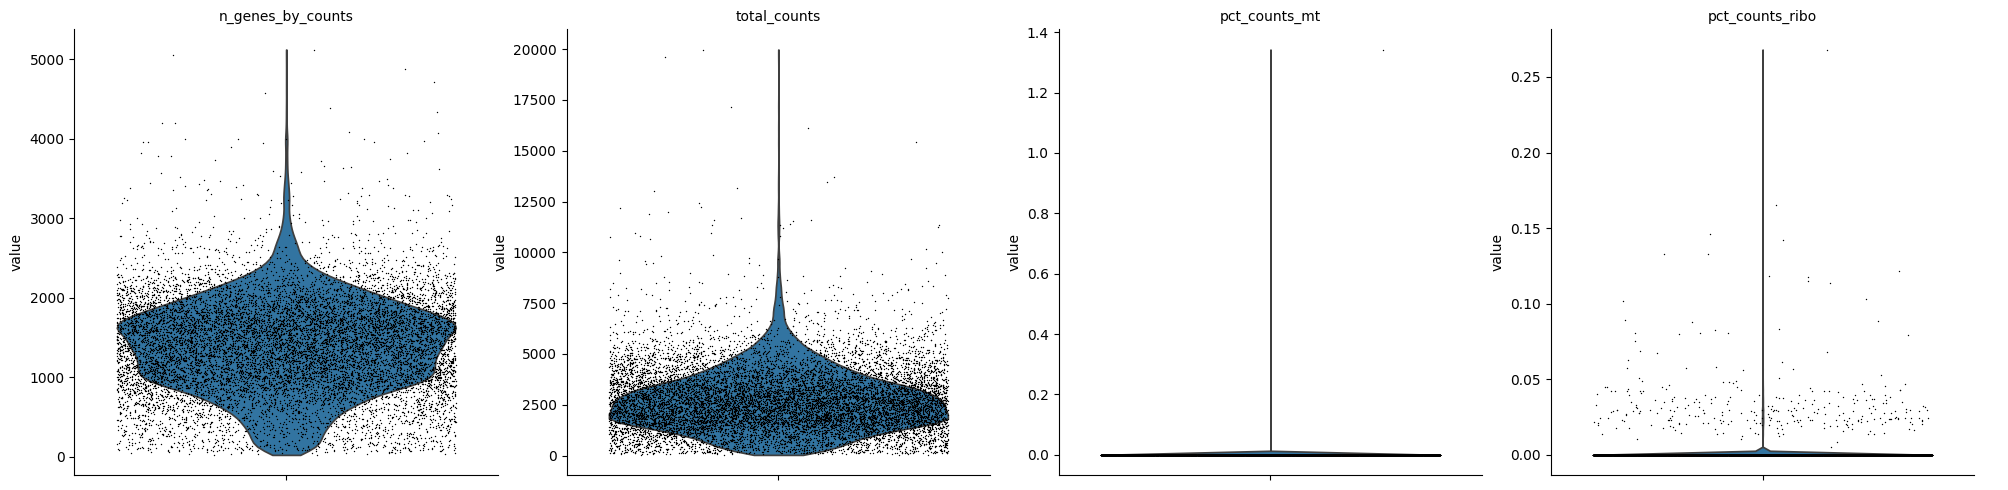

In [281]:
# Sample 1 Violin Plot  
sc.pl.violin(crtl1, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [322]:
# Filter 
crtl1 = crtl1[crtl1.obs.n_genes_by_counts < 4500]
crtl1 = crtl1[crtl1.obs.pct_counts_mt < 0.5]
crtl1 = crtl1[crtl1.obs.pct_counts_ribo < 0.5]

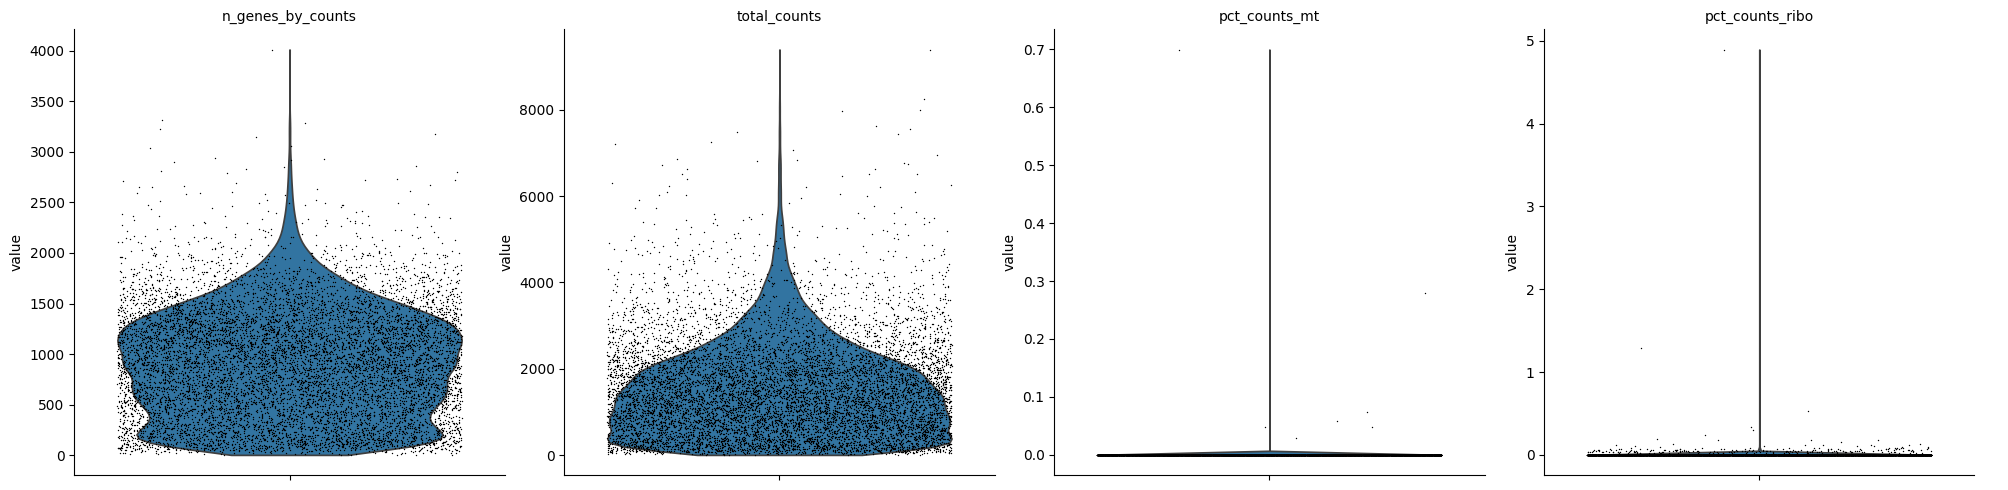

In [282]:
# Sample 2 Violin Plot  
sc.pl.violin(crtl2, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [323]:
# Filter 
crtl2 = crtl2[crtl2.obs.n_genes_by_counts < 3000]
crtl2 = crtl2[crtl2.obs.pct_counts_mt < 0.5]
crtl2 = crtl2[crtl2.obs.pct_counts_ribo < 0.5]

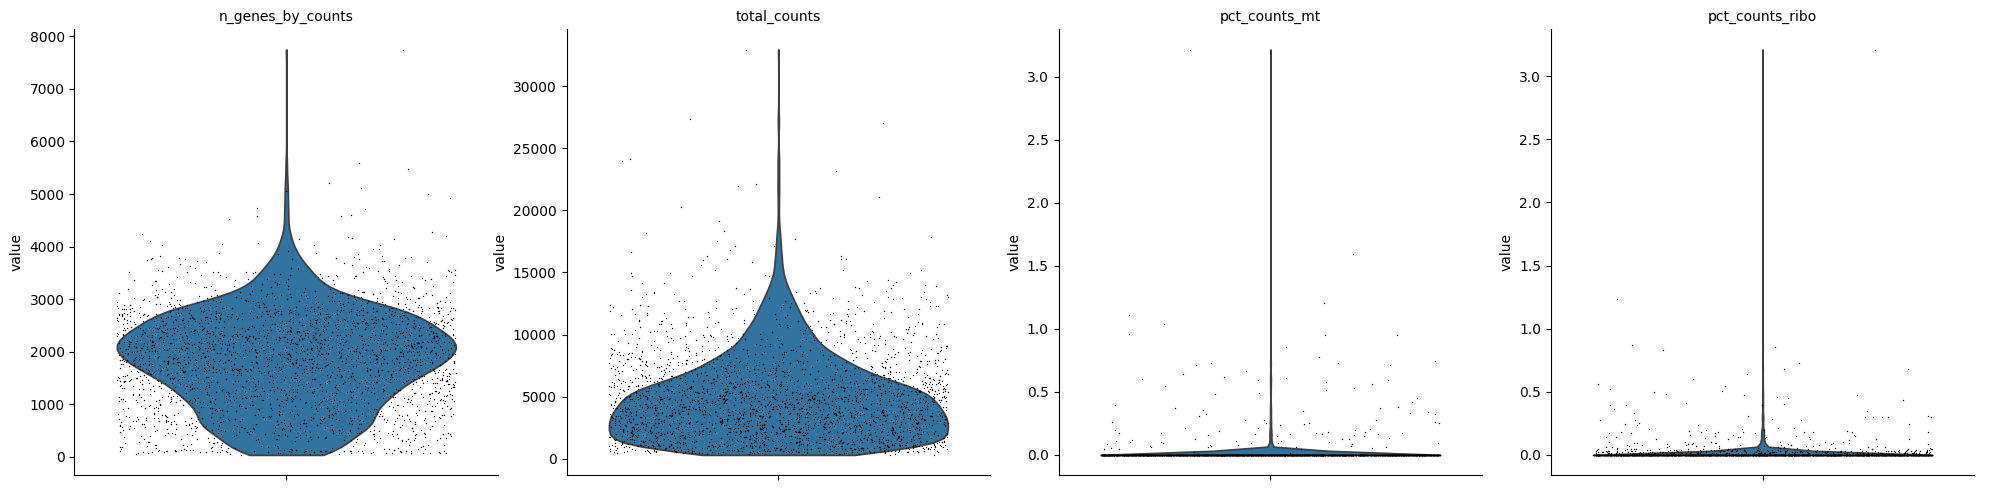

In [236]:
# Sample 3 Violin Plot  
sc.pl.violin(crtl3, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [324]:
# Filter 
crtl3 = crtl3[crtl3.obs.n_genes_by_counts < 5000]
crtl3 = crtl3[crtl3.obs.pct_counts_mt < 0.5]
crtl3 = crtl3[crtl3.obs.pct_counts_ribo < 0.5]

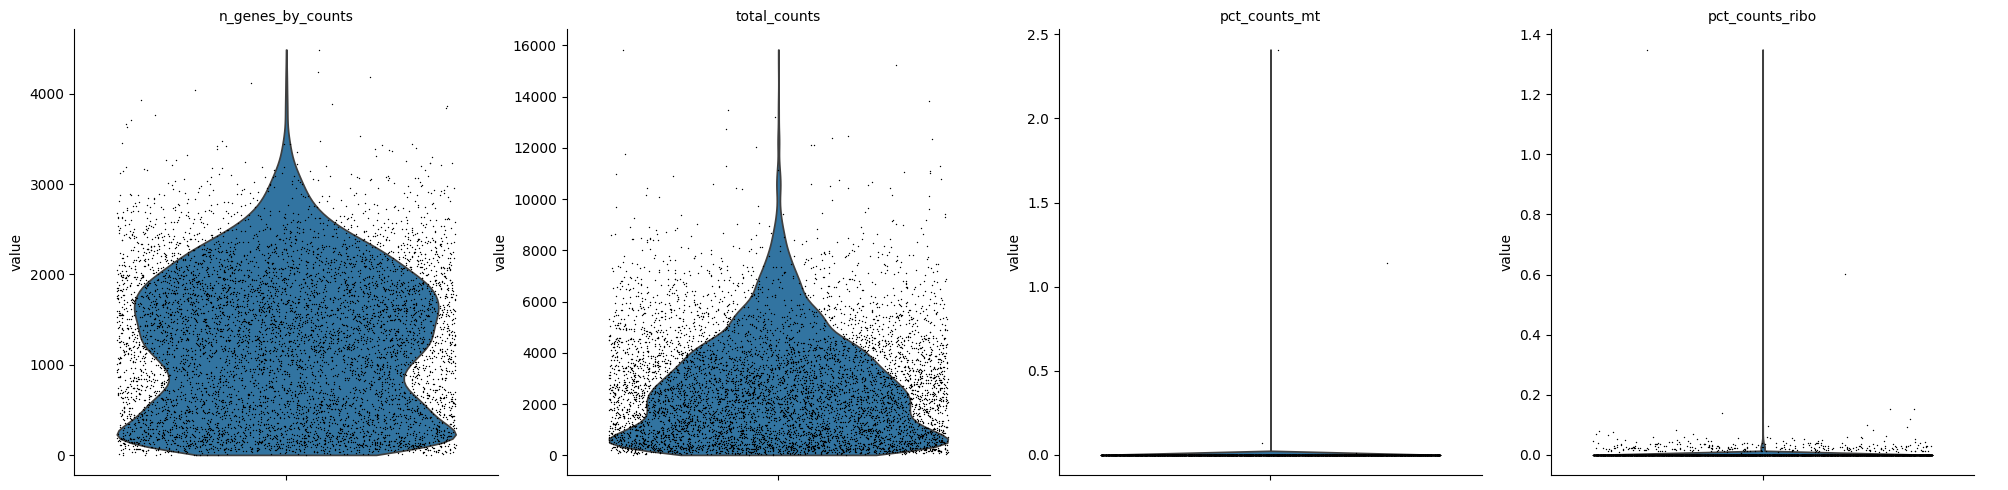

In [244]:
# Sample 4 Violin Plot  
sc.pl.violin(S14_1, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [325]:
# Filter 
S14_1 = S14_1[S14_1.obs.n_genes_by_counts < 3500]
S14_1 = S14_1[S14_1.obs.pct_counts_mt < 0.5]
S14_1 = S14_1[S14_1.obs.pct_counts_ribo < 0.5]

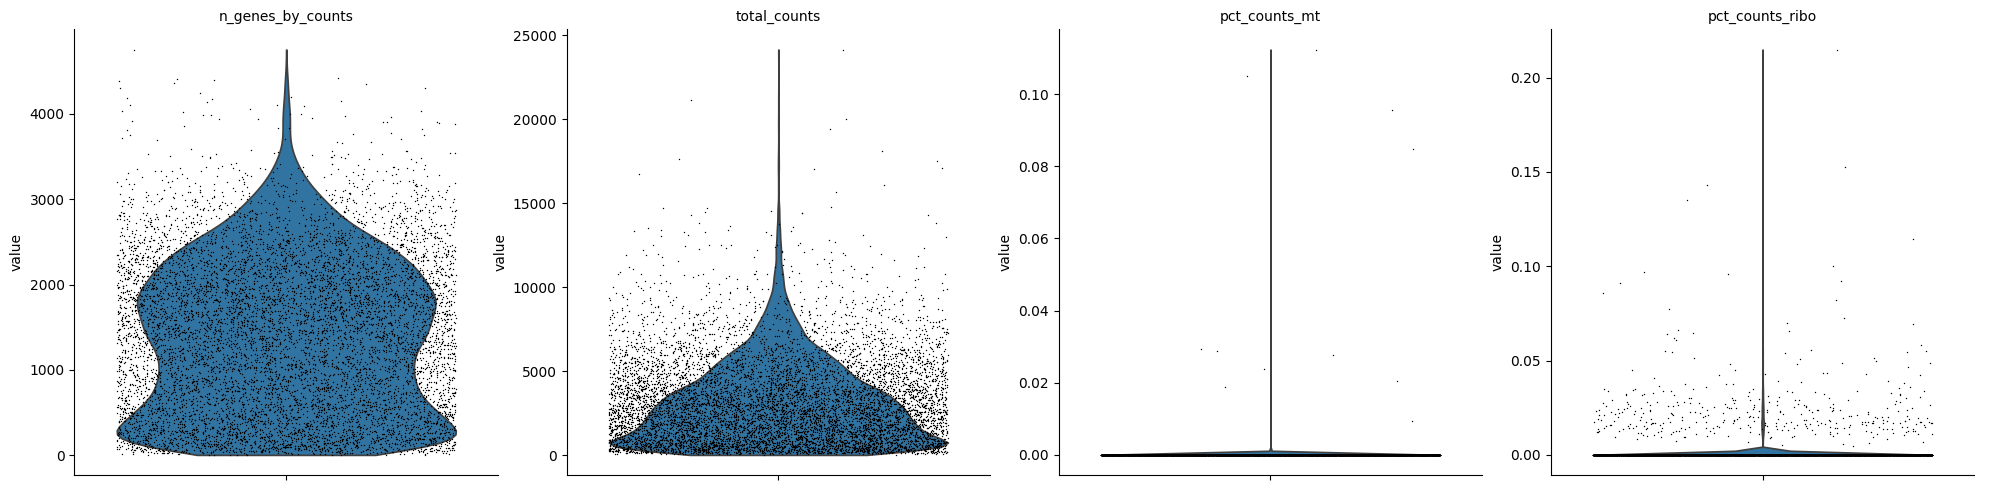

In [246]:
# Sample 5 Violin Plot  
sc.pl.violin(S14_2, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [326]:
# Filter 
S14_2 = S14_2[S14_2.obs.n_genes_by_counts < 4750]

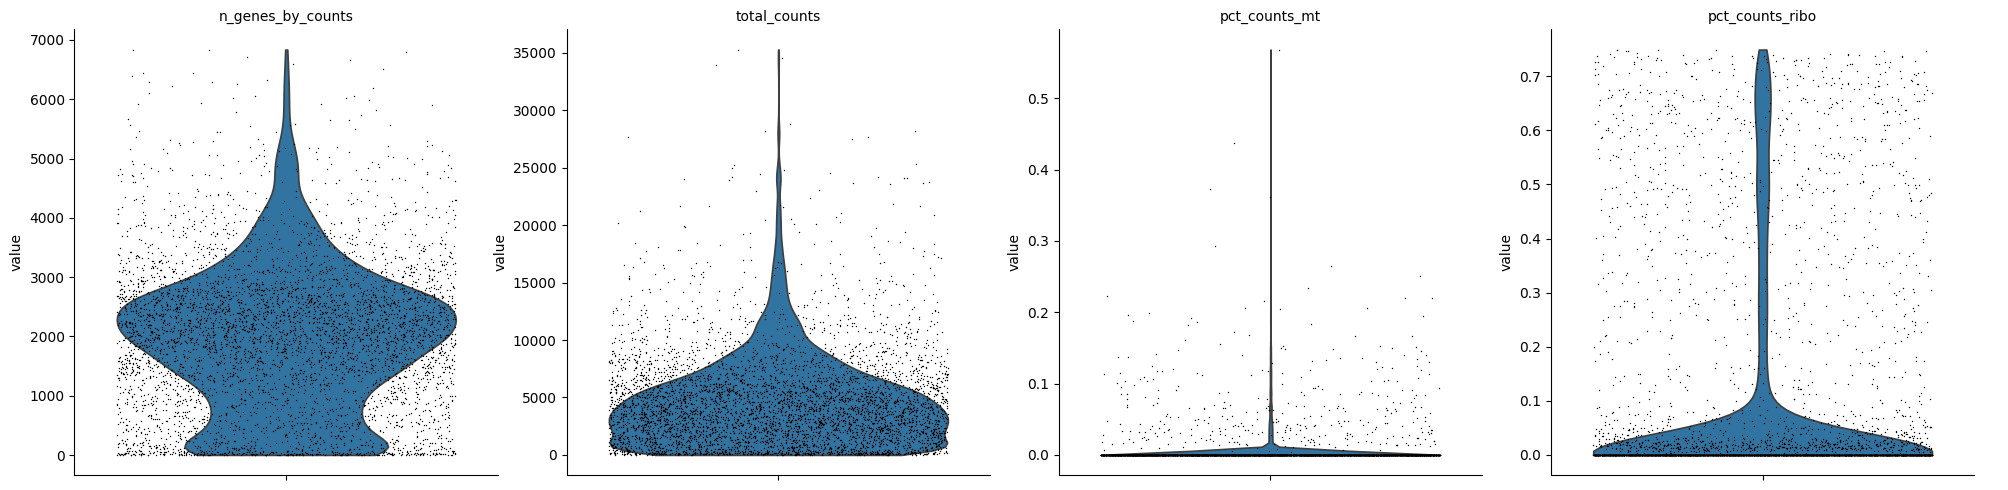

In [252]:
# Sample 6 Violin Plot  
sc.pl.violin(S70_1, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [327]:
# Filter 
S70_1 = S70_1[S70_1.obs.n_genes_by_counts < 7000]
S70_1 = S70_1[S70_1.obs.pct_counts_mt < 0.75]
S70_1 = S70_1[S70_1.obs.pct_counts_ribo < 0.75]

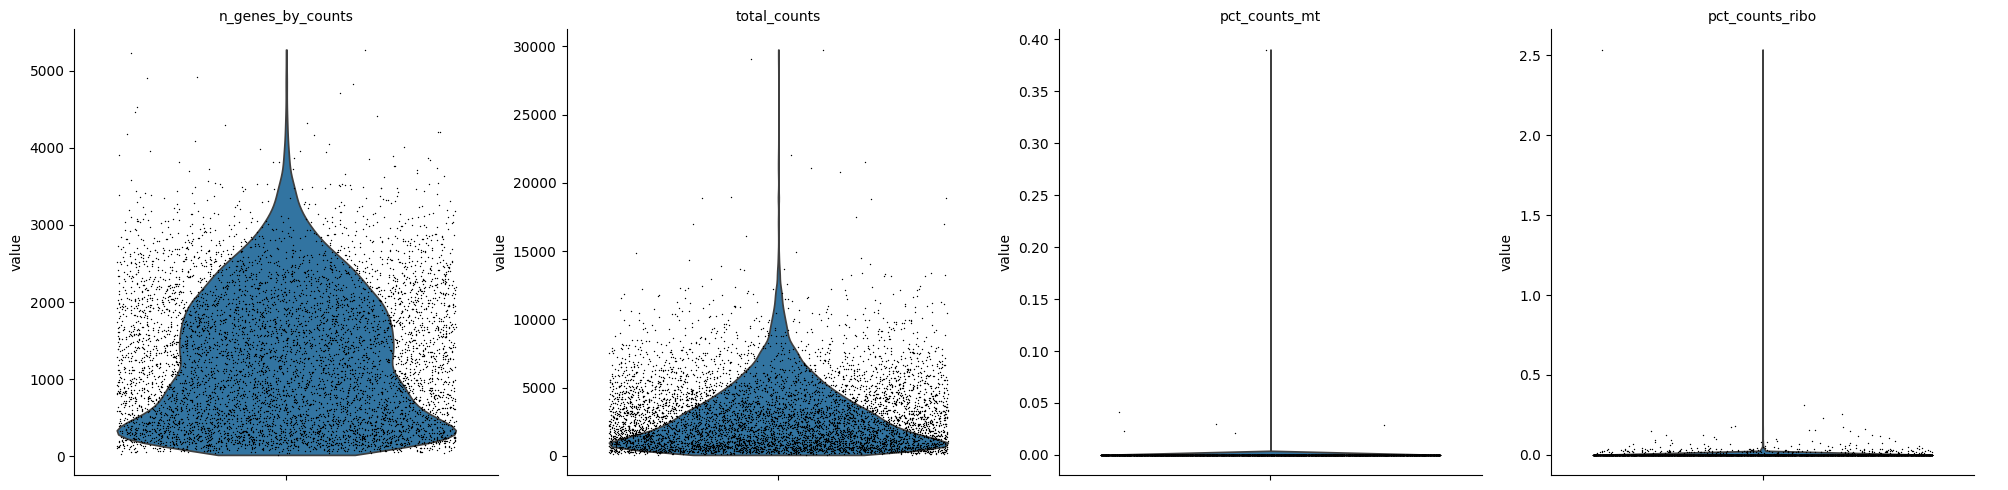

In [251]:
# Sample 7 Violin Plot  
sc.pl.violin(S70_2, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [328]:
# Filter 
S70_2 = S70_2[S70_2.obs.n_genes_by_counts < 4500]
S70_2 = S70_2[S70_2.obs.pct_counts_ribo < 0.5]

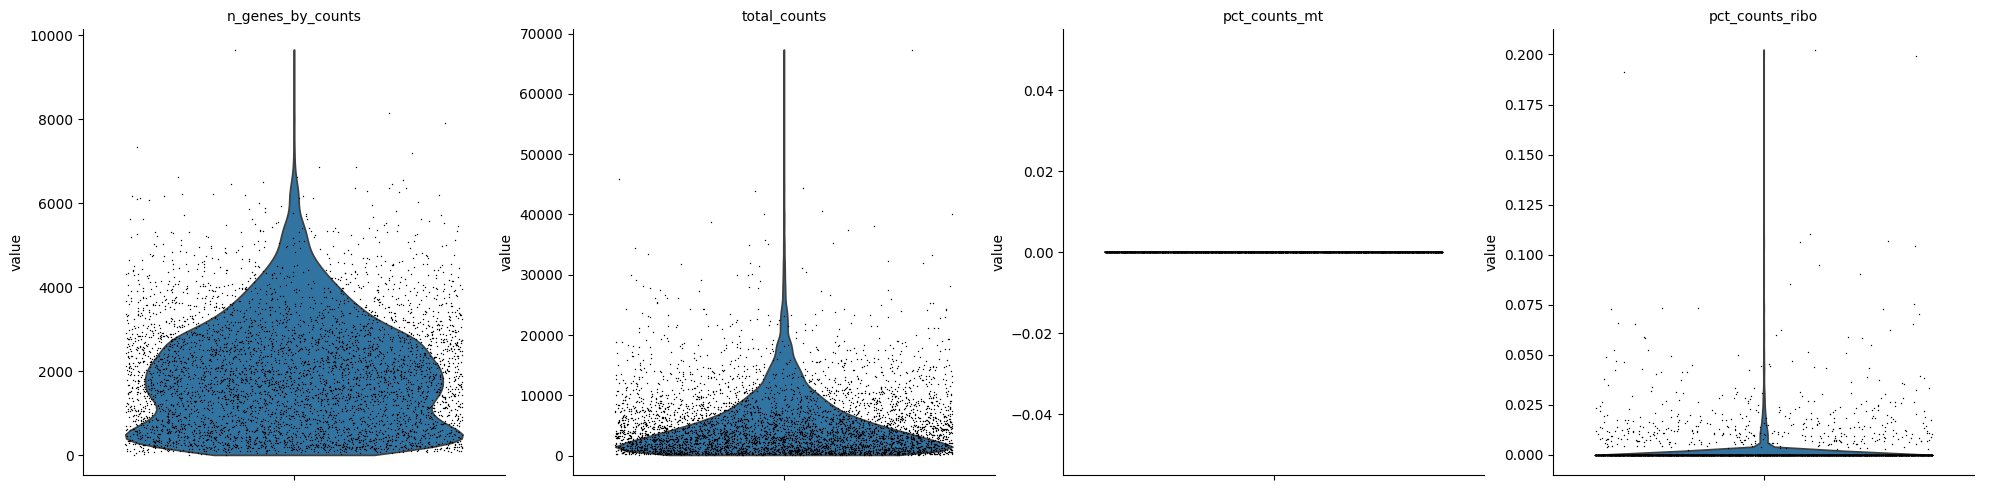

In [254]:
# Sample 8 Violin Plot 
sc.pl.violin(S120_1, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [329]:
# Filter 
S120_1 = S120_1[S120_1.obs.n_genes_by_counts < 6500]

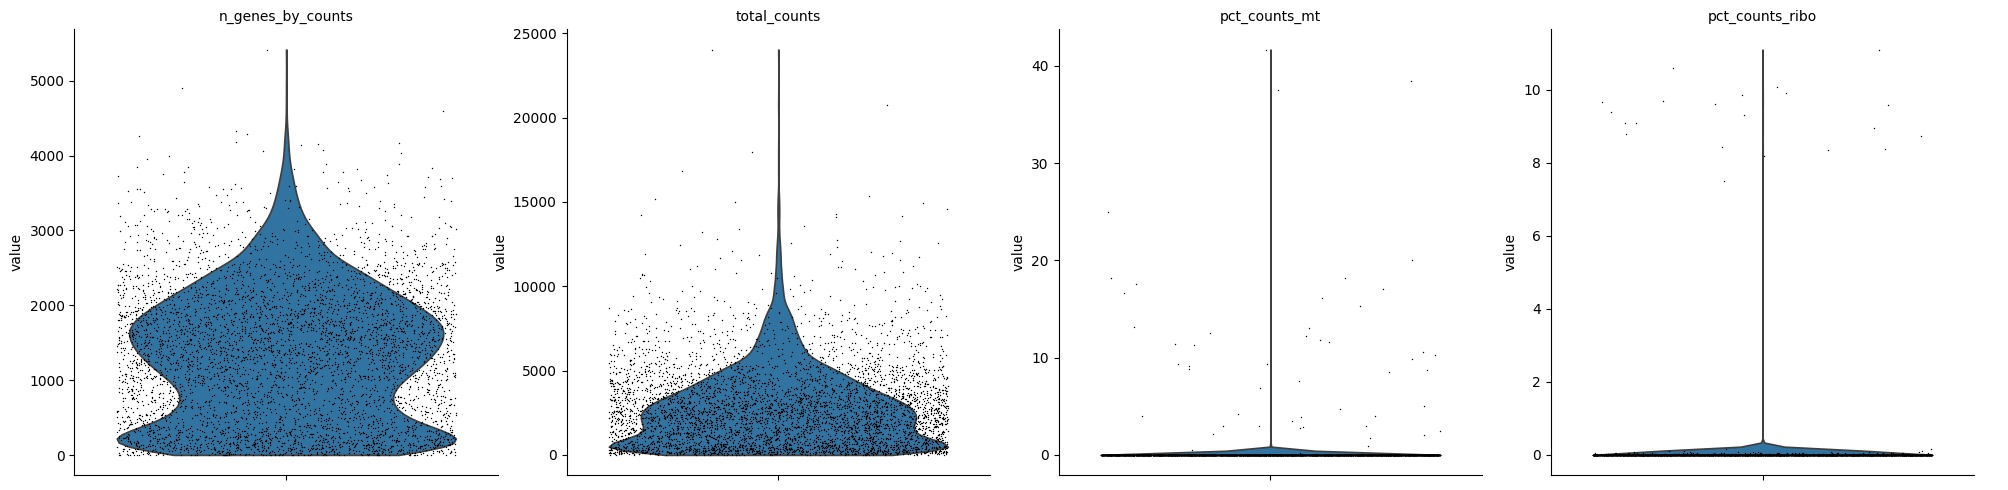

In [256]:
# Sample 9 Violin Plot 
sc.pl.violin(S120_2, ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"], jitter=0.4, multi_panel=True)

In [330]:
# Filter 
S120_2 = S120_2[S120_2.obs.n_genes_by_counts < 4500]
S120_2 = S120_2[S120_2.obs.pct_counts_mt < 0.75]
S120_2 = S120_2[S120_2.obs.pct_counts_ribo < 0.75]

Preprocessing for Scanorama integration 

In [331]:
# Create list of filtered data
Adata = [crtl1, crtl2, crtl3, S14_1, S14_2, S70_1, S70_2, S120_1, S120_2]

In [332]:
# Create preprocessing function 
def preprocess (sample):
    sc.pp.filter_cells(sample, min_genes=200) 
    sc.pp.filter_genes(sample, min_cells = 3) 
    sc.pp.normalize_total(sample, target_sum=1e4)
    sc.pp.log1p(sample)
    sc.pp.highly_variable_genes(sample, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [ ]:
# Run preprocessing function on list 
for i in Adata:
    preprocess(i)

### Scanorama Integration

In [ ]:
# Install scanorama integration method
!pip install scanorama
import scanorama

In [334]:
# Create list of preprocessed samples 
Adata = [crtl1, crtl2, crtl3, S14_1, S14_2, S70_1, S70_2, S120_1, S120_2]

Visualize data before integration

/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


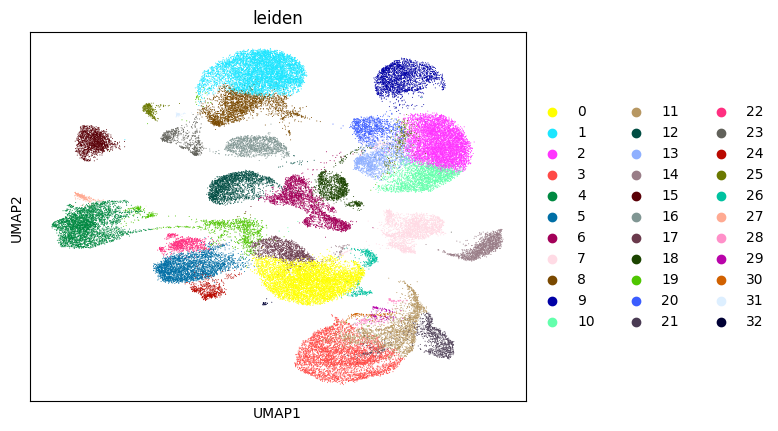

In [336]:
# Visualize data without integration
Adata_merged = sc.concat(Adata)
sc.pp.normalize_total(Adata_merged, target_sum=1e4)
sc.pp.log1p(Adata_merged)
sc.pp.highly_variable_genes(Adata_merged, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
sc.pp.regress_out(Adata_merged, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
sc.pp.scale(Adata_merged, max_value=10)
sc.pp.neighbors(Adata_merged, n_pcs = 30)
sc.tl.umap(Adata_merged)
sc.tl.leiden(Adata_merged)
sc.pl.umap(Adata_merged, color=['leiden'])


Perform Integration

In [ ]:
# Run scanorama integration and batch correction
Adata_cor = scanorama.correct_scanpy(Adata, return_dimred=True)

In [301]:
# Concatenate samples
Adata_integrated =sc.concat(Adata_cor, index_unique="-")

In [ ]:
# Install leiden algorithm for clustering
!pip install leidenalg

In [304]:
# Run UMAP and cluster
sc.pp.neighbors(Adata_integrated, use_rep="X_scanorama")
sc.tl.umap(Adata_integrated)
sc.tl.leiden(Adata_integrated, key_added="clusters")

/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/labuser/anaconda3/envs/ScRNA_Training/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


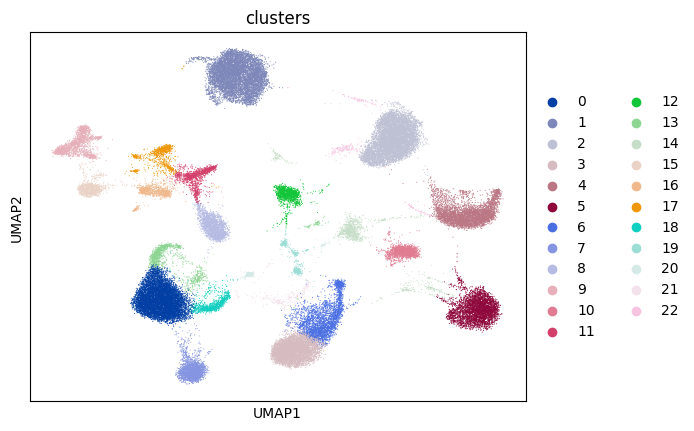

In [338]:
# Plot UMAP
sc.pl.umap(Adata_integrated, color="clusters")

In [390]:
# Save integrated file
Adata_integrated.obs['predicted_doublet'] = 'Singlet'
Adata_integrated.write_h5ad('combined_integrated_training.h5ad')